<h2> Traffic Accidents and Vehicle Involvement Between 2010 and 2011 in UK

team members: Muxue Liu, muxue; Yijia Wang, yijiaw;

<h4> Project Overview

This project aims to analyze traffic accidents and vehicle involvements between year 2010 and year 2011 to identify patterns and contributing factors. By combining two dataset together: accident information and vehicle information, conducting data manipulation and data visualization, we seek to understand the road accident better to improve the road safety. 


<h4> Motivation

Traffic accidents lead to death, injuries and economic costs worldwide. Data driven insights can help us know more about the factors and thus prevent future incidents. Identifying high risk areas can help the policy makers pay more attention and take more actions, such as better road design. For another important factor, vehicles, this information can help manufactures improve the safety design and give some reference to customers of buying cars. We believe that these considerations will be meaningful to save more lives.

<h4>Data Sources

The data come from the Open Data website of the UK government, where they have been published by the Department of Transport. This data are also published on Kaggle, so that we use the dataset from Kaggle for investigation. We use two dataset: `Accident_Information.csv, and Vehicle_Information.csv`.(https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles?resource=download)

Accident information contains unique accidents, and the corresponding road information, location and weather condition features. Vehicle information contains unique vehicle conditions. They complement each other by providing a comprehensive view of each traffic incident, and can be linked by the unique traffic accident identifier.

Since the dataset comprises over 1.8 million records of traffic accidents, which is too big. We prefer to focus on analyzing between two years: year 2010 and year 2011.

<h4>Data Description

We merged accident and traffic table by `Accident_Index`. The shape of the merged table is 2058408 rows and 57 columns. We specifically filtered out data for year 2010 and 2011, which is the most recent ones we can get in the dataset, then the table become 360983 rows and 57 columns.

Variables of Interest:
1. `Year_y` we mainly focused on year 2010 and 2011.
2. `Accident_Severity` categorical variables that set accident to three levels Slight which has 312066, Serious which has 44389 and Fatal which has 4528.
3. 


Columns such as Accident_Index, 1st_Road_Class, Accident_Severity, Date, Day_of_Week, and several other columns have no missing data. These columns include identifiers, road classifications, accident severity levels, and temporal data.

In [46]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load the data
vehicle = pd.read_csv('Vehicle_Information.csv', encoding='ISO-8859-1')

vehicle.head(3)

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004


In [11]:
vehicle[vehicle['Year']==2011].reset_index(drop=True).head(3)

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,201101BS70001,Data missing or out of range,NaN,Data missing or out of range,NaN,NaN,NaN,NaN,Not known,Mid Junction - on roundabout or on main road,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2011
1,201101BS70002,26 - 35,4.0,Urban area,5.0,125.0,NaN,NaN,Not known,Mid Junction - on roundabout or on main road,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Motorcycle 125cc and under,No,Nearside,2011
2,201101BS70003,46 - 55,9.0,Urban area,2.0,7300.0,NaN,NaN,Journey as part of work,Not at or within 20 metres of junction,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2011


In [12]:
accident = pd.read_csv('Accident_Information.csv', encoding='ISO-8859-1')

accident.head(3)

/var/folders/hv/3fmr3cm56qb20ny85bxzl_dr0000gn/T/ipykernel_36380/2197546017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  accident = pd.read_csv('Accident_Information.csv', encoding='ISO-8859-1')


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No


In [13]:
accident[accident['Year']==2011].reset_index(drop=True).head(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,201101BS70001,C,0.0,Unclassified,0.0,Slight,NaN,2011-01-13,Thursday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,16:54,Urban,Raining no high winds,2011,No
1,201101BS70002,C,0.0,Unclassified,0.0,Serious,NaN,2011-01-11,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,19:45,Urban,Fine no high winds,2011,No
2,201101BS70003,B,304.0,NaN,0.0,Slight,NaN,2011-01-19,Wednesday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,17:30,Urban,Fine no high winds,2011,No


In [14]:
# Merging the datasets on 'Accident_Index'
combined_data = pd.merge(accident, vehicle, on='Accident_Index')
combined_data

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-11,Tuesday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058403,2016984131116,B,7020.0,C,49.0,Slight,NaN,2016-11-01,Tuesday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2016
2058404,2016984131116,B,7020.0,C,49.0,Slight,NaN,2016-11-01,Tuesday,1.0,...,NaN,No tow/articulation,Offside,0.0,Going ahead other,2,Car,No,Front,2016
2058405,2016984131216,A(M),74.0,NaN,0.0,Slight,NaN,2016-10-27,Thursday,1.0,...,NaN,No tow/articulation,Offside on to central reservation,0.0,Going ahead other,1,Goods 7.5 tonnes mgw and over,No,Offside,2016
2058406,2016984131316,B,724.0,NaN,0.0,Slight,NaN,2016-10-29,Saturday,1.0,...,Skidded,No tow/articulation,Offside,0.0,Going ahead other,1,Car,No,Front,2016


In [55]:
combined_data.shape

(2058408, 57)

In [19]:
combined_data.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year_x', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',


In [33]:
# Select year 2010 and 2011
data_2010_2011 = combined_data[(combined_data['Year_y'] == 2010) | (combined_data['Year_y'] == 2011)]
data_2010_2011.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
659243,201001BS70003,B,302.0,Unclassified,0.0,Slight,NaN,2010-01-11,Monday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,Van / Goods 3.5 tonnes mgw or under,No,Front,2010
659244,201001BS70004,A,402.0,A,4204.0,Slight,NaN,2010-01-11,Monday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2010
659245,201001BS70006,A,402.0,B,450.0,Slight,NaN,2010-01-12,Tuesday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Turning left,1,Goods over 3.5t. and under 7.5t,No,Nearside,2010
659246,201001BS70007,Unclassified,0.0,Unclassified,0.0,Slight,NaN,2010-01-02,Saturday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Car,No,Nearside,2010
659247,201001BS70007,Unclassified,0.0,Unclassified,0.0,Slight,NaN,2010-01-02,Saturday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Car,No,Front,2010


In [35]:
# Check the shape of the data
data_2010_2011.shape

(360983, 57)

In [54]:
data_2010_2011['Accident_Severity'].value_counts()

Accident_Severity
Slight     312066
Serious     44389
Fatal        4528
Name: count, dtype: int64

In [36]:
# Check how many missing values are there in each column
data_2010_2011.isnull().sum()

Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     0
2nd_Road_Class                                 143820
2nd_Road_Number                                  4448
Accident_Severity                                   0
Carriageway_Hazards                            354838
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident         0
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                            0
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                   

In [38]:
# Check second road class
data_2010_2011['2nd_Road_Class'].value_counts()

2nd_Road_Class
Unclassified    143323
A                37311
C                18637
B                14419
Motorway          3109
A(M)               364
Name: count, dtype: int64

#### Data Manipulation

For columns like 2nd_Road_Class, Carriageway_Hazards, Special_Conditions_at_Site, Hit_Object_in_Carriageway, and Hit_Object_off_Carriageway with a significant amount of missing data, drop them.

In [39]:
columns_to_drop = [
    "2nd_Road_Class",
    "Carriageway_Hazards",
    "Special_Conditions_at_Site",
    "Hit_Object_in_Carriageway",
    "Hit_Object_off_Carriageway"
]

df_cleaned = data_2010_2011.drop(columns=columns_to_drop)


For the remaining columns, we can do mean imputation for numeric columns and impute the most frequent category for categorical values.

In [40]:
# Select numerical columns and fill missing values with the mean
numerical = df_cleaned.select_dtypes(include='number').columns
df_cleaned[numerical] = df_cleaned[numerical].fillna(df_cleaned[numerical].mean())

In [41]:
# Select non-numerical columns and fill missing values with the most common value
categorical = df_cleaned.select_dtypes(exclude='number').columns
df_cleaned[categorical] = df_cleaned[categorical].fillna(df_cleaned[categorical].mode().iloc[0])

In [42]:
# Check if there are any missing values left
df_cleaned.isnull().sum().sum()

0

<h4> Data Visulization

##### Trend Analysis:

How did the number of traffic accidents change from 2010 to 2011?
Were there any notable changes in the severity of accidents between the two years?


In [43]:
# How did the number of traffic accidents change from 2010 to 2011?
df_cleaned['Year_y'].value_counts()


Year_y
2011    180616
2010    180367
Name: count, dtype: int64

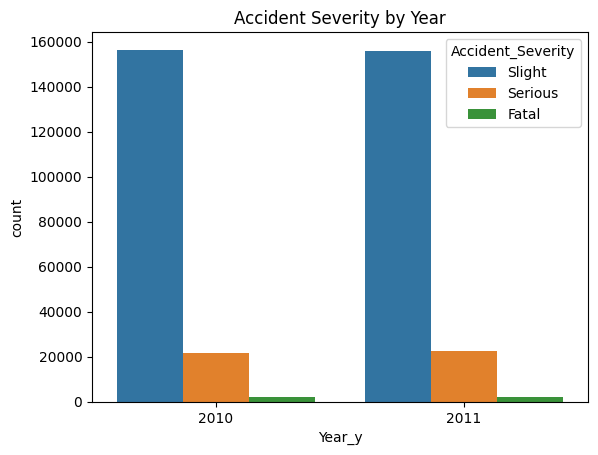

In [45]:
# Were there any notable changes in the severity of accidents between the two years?
# Plot the number of accidents by severity and year
ax = sns.countplot(data=df_cleaned, x='Year_y', hue='Accident_Severity')
ax.set_title('Accident Severity by Year')
plt.show()

##### Accident Conditions:

How did weather conditions impact the number of accidents in each year? Are there certain weather conditions more likely to be associated with accidents?
Did the time of day or day of the week significantly affect the occurrence of accidents?


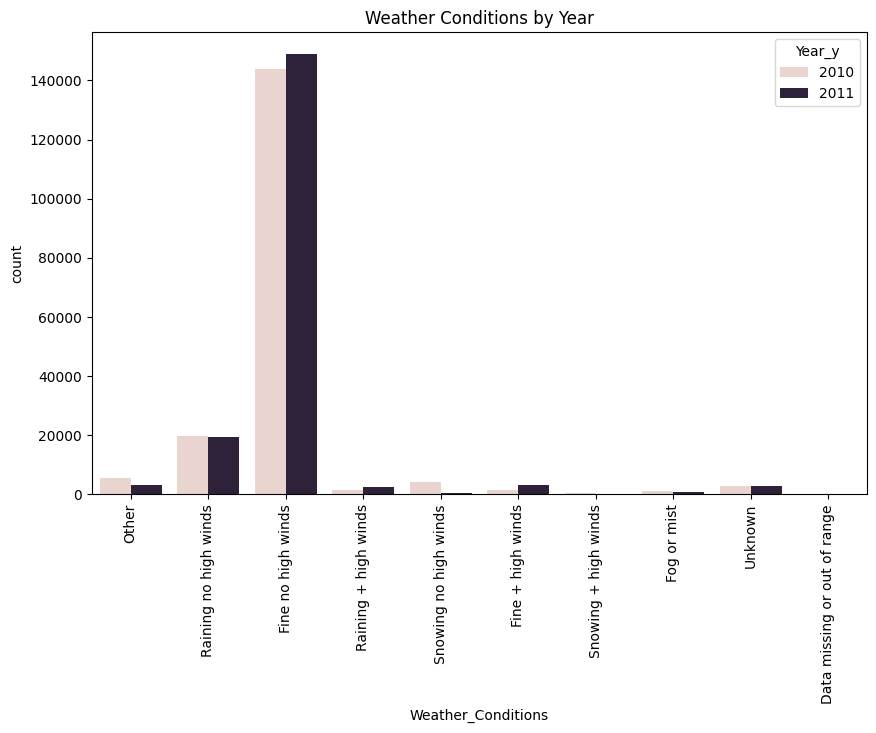

In [51]:
# How did weather conditions impact the number of accidents in each year
# Plot the number of accidents by weather conditions and year
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned, x='Weather_Conditions', hue='Year_y')
ax.set_title('Weather Conditions by Year')
plt.xticks(rotation=90)
plt.show()

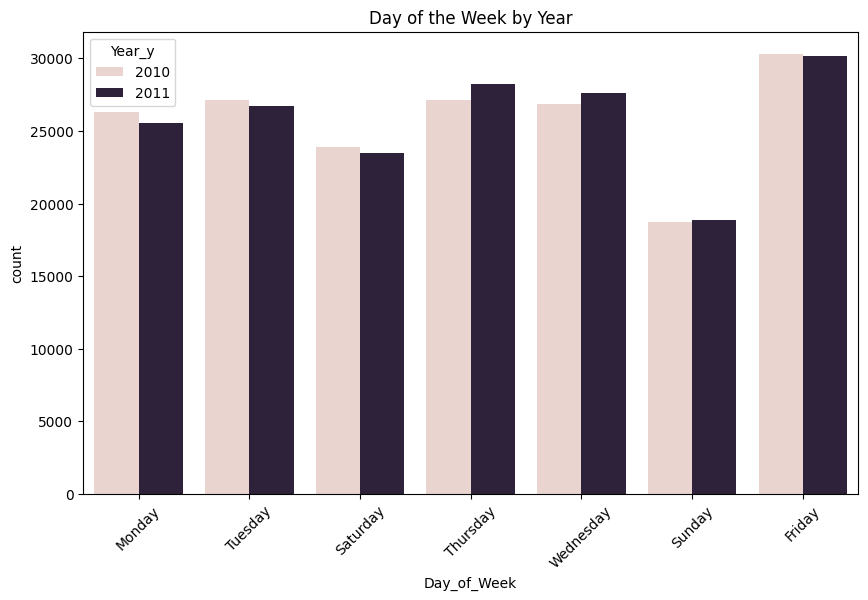

In [49]:
# Did the time of day or day of the week significantly affect the occurrence of accidents?
# Plot the number of accidents by time day of the week
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned, x='Day_of_Week', hue='Year_y')
ax.set_title('Day of the Week by Year')
plt.xticks(rotation=45)
plt.show()